<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/Supervised_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = {
    'Age': [25, 30, 45, 40, 55, 50],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'Occupation': ['Engineer', 'Doctor', 'Doctor', 'Engineer', 'Lawyer', 'Lawyer'],
    'Income': [50000, np.nan, 80000, np.nan, 120000, 100000]
}

df = pd.DataFrame(data)
print("Original Data:\n")
df

Original Data:



,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,NaN
2,45,M,Doctor,80000.0
3,40,F,Engineer,NaN
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **Imputation using mean**

In [ ]:
mean_income = df['Income'].mean()
df_mean = df.copy()
df_mean['Income'].fillna(mean_income, inplace=True)
print("\n Mean Imputed:", mean_income)
df_mean


 Mean Imputed: 87500.0


,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,87500.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,87500.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


In [ ]:
median_income = df['Income'].median()
df_median = df.copy()
df_median['Income'].fillna(median_income, inplace=True)
print("\nMedian Imputed:", median_income)
df_median


Median Imputed: 90000.0


,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,90000.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,90000.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **Using Groupby**

In [ ]:
df_group = df.copy()
df_group['Income']= df_group.groupby('Occupation')['Income'].transform(lambda x: x.fillna(x.mean()))
print("\n Group-by occupation Imputed:\n")
df_group


 Group-by occupation Imputed:



,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,80000.0
2,45,M,Doctor,80000.0
3,40,F,Engineer,50000.0
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


# **How to Treat Outlier?**

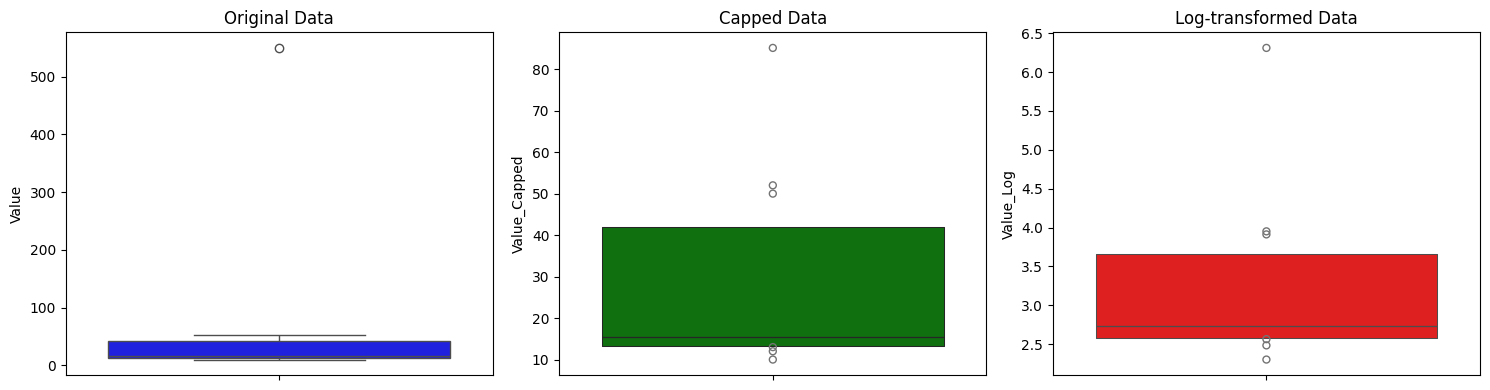

In [ ]:
from os import ST_NOSUID
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = np.array([10,12,13,14,15,16,18,50,52,550])
df = pd.DataFrame({'Value': data})

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

IQR = Q3 - Q1
lower_cap = Q1 - 1.5*IQR
upper_cap = Q3 + 1.5*IQR

df['Value_Capped'] = df['Value'].clip(lower=lower_cap, upper=upper_cap)

df['Value_Log'] = np.log(df['Value'])

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=df['Value'], color='blue')
plt.title('Original Data')

plt.subplot(1,3,2)
sns.boxenplot(y=df['Value_Capped'], color='green')
plt.title('Capped Data')

plt.subplot(1,3,3)
sns.boxenplot(y=df['Value_Log'], color='red')
plt.title('Log-transformed Data')

plt.tight_layout()
plt.show()





# **RECAP**
# **Demonstration with Data**

In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Salary': [30000, 45000, 55000, 60000, 75000, 120000]
})
print("Original Data:\n", data)

Original Data:
    Salary
0   30000
1   45000
2   55000
3   60000
4   75000
5  120000


# **Standardization (Z-score)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

data['Salary_Standardized'] = scaler_std.fit_transform(data[['Salary']])
print("\n Standardized Data:\n", data[['Salary', 'Salary_Standardized']])


 Standardized Data:
    Salary  Salary_Standardized
0   30000            -1.199159
1   45000            -0.672699
2   55000            -0.321725
3   60000            -0.146239
4   75000             0.380221
5  120000             1.959601


# **Min-Max Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data['Salary_MinMax'] = scaler_minmax.fit_transform(data[['Salary']])

print("\nMin-Max Normalized Data:\n", data[['Salary', 'Salary_MinMax']])


Min-Max Normalized Data:
    Salary  Salary_MinMax
0   30000       0.000000
1   45000       0.166667
2   55000       0.277778
3   60000       0.333333
4   75000       0.500000
5  120000       1.000000


# **Label Encoding (No inherent order)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Asia', 'Australia', 'Europe', 'Asia']
})

print("Original Data:\n", data)

encoder = LabelEncoder()
data['Region_Encoded'] = encoder.fit_transform(data['Region'])

print("\nLabel Encoded Data:\n", data)

Original Data:
           Region
0  North America
1         Europe
2           Asia
3      Australia
4         Europe
5           Asia

Label Encoded Data:
           Region  Region_Encoded
0  North America               3
1         Europe               2
2           Asia               0
3      Australia               1
4         Europe               2
5           Asia               0


Encoded values have no meaningful numeric order.


# **Practical Example using OrdinalEncoder**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']
})

print("Original Data:\n", data)

education_order = ['High School', 'Bachelor', 'Master', 'PhD']

oe = OrdinalEncoder(categories=[education_order])

data['Education_Level_Encoded'] = oe.fit_transform(data[['Education_Level']])

print("\nOrdinal Encoded Data:\n", data)


Original Data:
   Education_Level
0     High School
1        Bachelor
2          Master
3             PhD
4        Bachelor
5          Master

Ordinal Encoded Data:
   Education_Level  Education_Level_Encoded
0     High School                      0.0
1        Bachelor                      1.0
2          Master                      2.0
3             PhD                      3.0
4        Bachelor                      1.0
5          Master                      2.0


# **One-Hot Encoding (OneHotEncoder)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame({'City': ['New York', 'Paris', 'London', 'Paris']})

ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(data[['City']])

# Create DataFrame
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['City']))

print(encoded_df)

   City_London  City_New York  City_Paris
0          0.0            1.0         0.0
1          0.0            0.0         1.0
2          1.0            0.0         0.0
3          0.0            0.0         1.0
